In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('black-friday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.shape

(550068, 12)

In [8]:
df=df.bfill(axis=1)

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category_1          550068 non-null  object
 9   Product_Category_2          550068 non-null  object
 10  Product_Category_3          550068 non-null  object
 11  Purchase                    550068 non-null  object
dtypes: object(12)
memory usage: 50.4+ MB


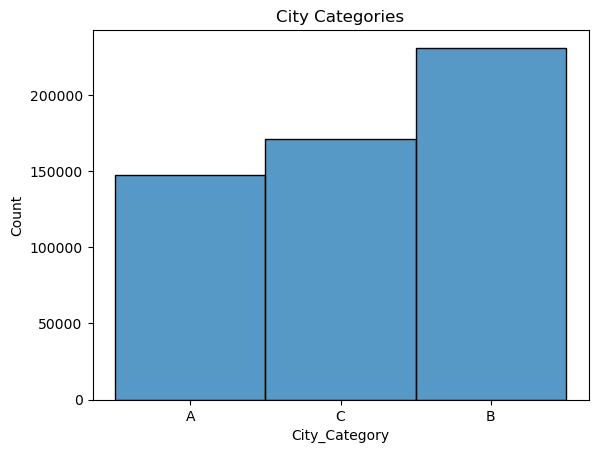

In [11]:
sns.histplot(df['City_Category'])
plt.title('City Categories')
plt.show()

In [12]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].map({'4+':4})

In [13]:
# df['Stay_In_Current_City_Years'].unique()

In [14]:
def getYears(x):
    if x in['3','4+']:
        return 1
    else:
        return 0
df['Stayed_Longer_3_Years']=df['Stay_In_Current_City_Years'].apply(getYears)

In [15]:
df.drop(columns=['Stay_In_Current_City_Years'],inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_cols=['Age','Gender','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   User_ID                550068 non-null  object
 1   Product_ID             550068 non-null  object
 2   Gender                 550068 non-null  int32 
 3   Age                    550068 non-null  int32 
 4   Occupation             550068 non-null  int32 
 5   City_Category          550068 non-null  int32 
 6   Marital_Status         550068 non-null  int32 
 7   Product_Category_1     550068 non-null  int32 
 8   Product_Category_2     550068 non-null  int32 
 9   Product_Category_3     550068 non-null  int32 
 10  Purchase               550068 non-null  object
 11  Stayed_Longer_3_Years  550068 non-null  int64 
dtypes: int32(8), int64(1), object(3)
memory usage: 33.6+ MB


In [18]:
X=df.drop(columns=['User_ID','Product_ID','Purchase'])
y=df['Purchase']
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [20]:
def get_model(m):
    model=m()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    return r2_score(y_test,y_pred) , mean_squared_error(y_test,y_pred)
    

In [21]:
get_model(LinearRegression)

(0.29655754110797317, 17728350.432534937)

In [22]:
from sklearn.linear_model import Ridge,Lasso
get_model(Ridge)

(0.2965575609396508, 17728349.93273154)

In [23]:
get_model(Lasso)

(0.2965606668825792, 17728271.65590312)

In [24]:
model=LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=model.predict(X_test)

In [27]:
r2_score(y_test,y_pred)

0.29655754110797317

<Axes: ylabel='Product_Category_1'>

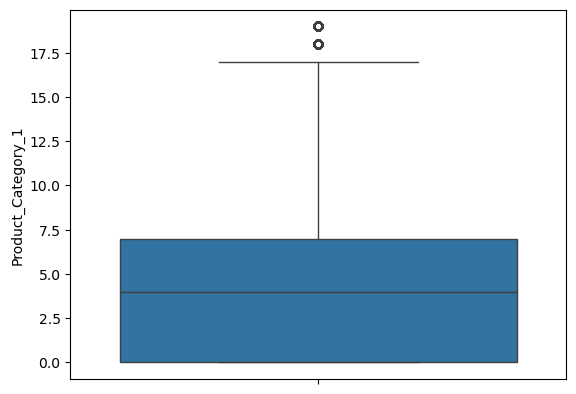

In [28]:
sns.boxplot(df['Product_Category_1'])

In [29]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stayed_Longer_3_Years
0,1000001,P00069042,0,0,10,0,0,2,5350,6401,8370,0
1,1000001,P00248942,0,0,10,0,0,0,4,10,15200,0
2,1000001,P00087842,0,0,10,0,0,11,542,596,1422,0
3,1000001,P00085442,0,0,10,0,0,11,12,504,1057,0
4,1000002,P00285442,1,6,16,2,0,7,4966,6000,7969,0
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,19,119,136,368,0
550064,1006035,P00375436,0,2,1,2,0,19,122,139,371,0
550065,1006036,P00375436,0,2,15,1,1,19,48,46,137,0
550066,1006038,P00375436,0,6,1,2,0,19,116,133,365,0


<Axes: >

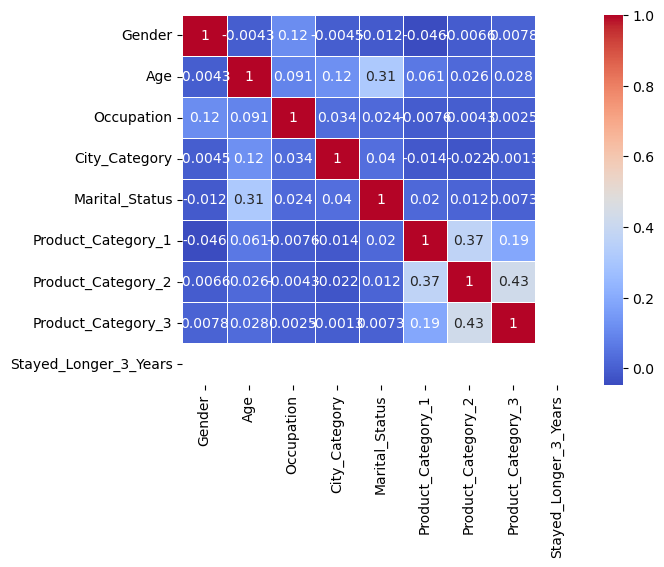

In [30]:
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidth=0.5,cmap='coolwarm')